# Visualizations

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
np.random.seed(1234)

import sys
sys.path.append("../src")
from utils import data as udata
from utils import dists as udists
from utils import misc as u
from tqdm import tqdm, trange
import os.path as path
import json
import models
import viz

In [229]:
EXP_DIR = "../data/processed/cdc-flusight-ensemble/"
INPUT_DIR = "../models/cdc-flusight-ensemble/"
TARGET = "1-ahead"
# We use all the regions as of now
REGION = None
SEASONS = [2010]

In [230]:
components = [udata.Component(EXP_DIR, m) for m in udata.available_models(EXP_DIR)]
ad = udata.ActualData(EXP_DIR)

In [231]:
yi_f, Xs_f, y_f = udata.get_seasons_data(ad, components, SEASONS, TARGET, REGION, latest=False)

# There are certain nans in the first truth values, we will skip those as of now
# (imputing is wasteful)
selection = ~pd.isna(y_f)
yi_f = yi_f[selection]
Xs_f = [X[selection] for X in Xs_f]
y_f = y_f[selection]

yi_l, Xs_l, y_l = udata.get_seasons_data(ad, components, SEASONS, TARGET, REGION, latest=True)
yi_l = yi_l[selection]
Xs_l = [X[selection] for X in Xs_l]
y_l = y_l[selection]

In [232]:
p_f = udists.prediction_probabilities(Xs_f, y_f, TARGET)
p_l = udists.prediction_probabilities(Xs_l, y_l, TARGET)

# mm plots

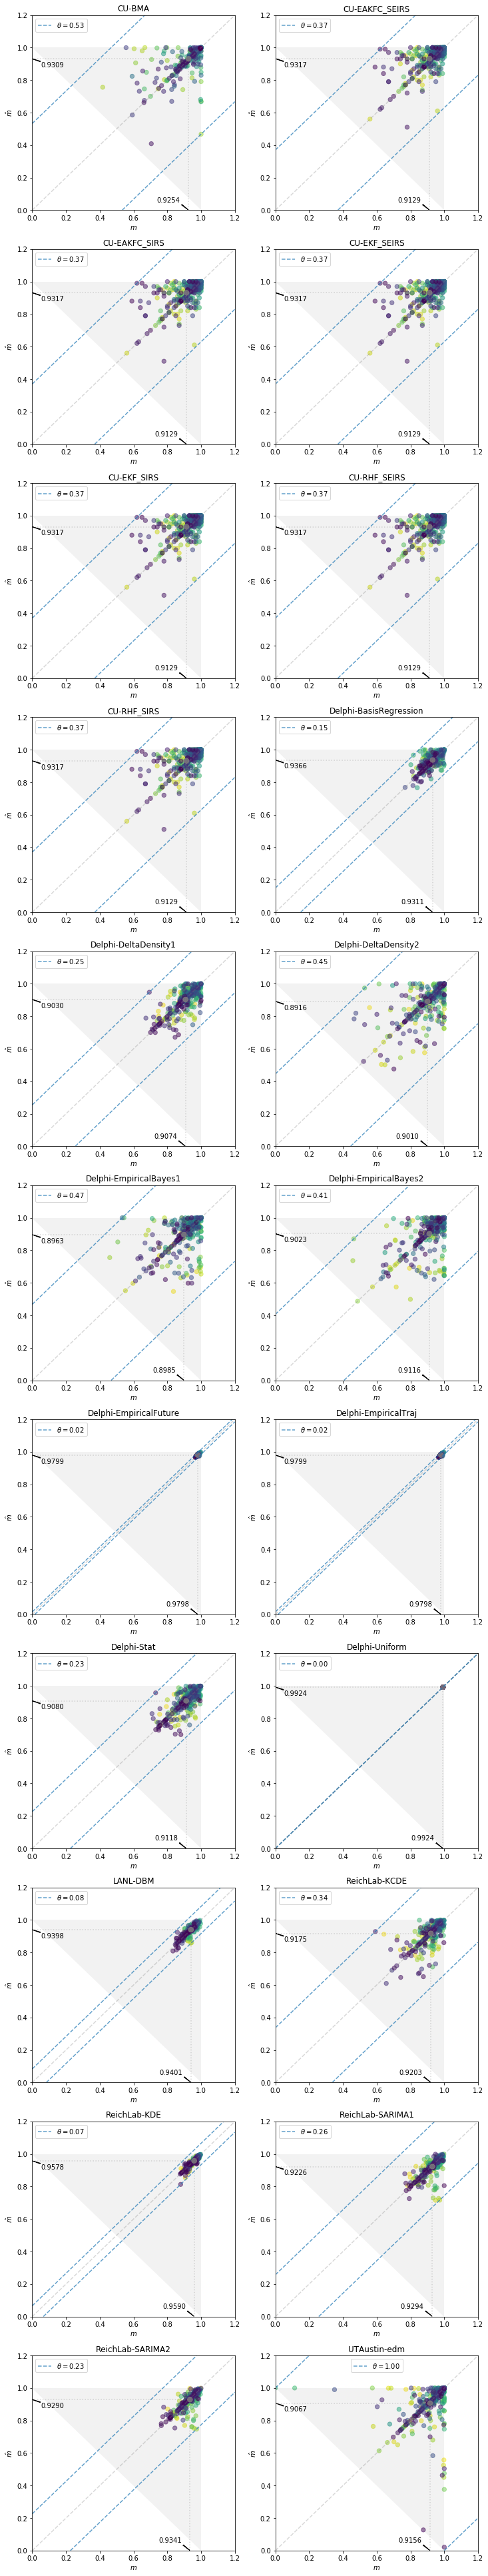

In [233]:
fig, axes = plt.subplots(11, 2, figsize=(12, 70))

for i, ax in enumerate(fig.axes):
    m = 1 - p_l[:, i]
    m_hat = 1 - p_f[:, i]
    viz.plot_mm(ax, m, m_hat, components[i].name)